In [151]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle, islice
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
pd.set_option('future.no_silent_downcasting', True)

<H1> Dados Reais

In [174]:
def generate_real_data():
    real_data = {} 
    # mammographic_mass = fetch_ucirepo(id=161) 
    
    # X = mammographic_mass.data.features 
    # y = mammographic_mass.data.targets 


    # blood_transfusion_service_center = fetch_ucirepo(id=176) 
    
    # X = blood_transfusion_service_center.data.features 
    # y = blood_transfusion_service_center.data.targets 


    # autism_screening_adult = fetch_ucirepo(id=426) 
    
    # X = autism_screening_adult.data.features 
    # y = autism_screening_adult.data.targets 


    # cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
    
    # X = cervical_cancer_risk_factors.data.features 
    # y = cervical_cancer_risk_factors.data.targets  


    # raisin = fetch_ucirepo(id=850) 

    # X = raisin.data.features 
    # y = raisin.data.targets 

    # hcv_data = fetch_ucirepo(id=571) 
    
    # X = hcv_data.data.features 
    # y = hcv_data.data.targets 


    # estimation_of_obesity_levels = fetch_ucirepo(id=544) 
    
    # X = estimation_of_obesity_levels.data.features 
    # y = estimation_of_obesity_levels.data.targets 


    # purchasing_intention_dataset = fetch_ucirepo(id=468) 
    
    # X = purchasing_intention_dataset.data.features.copy()
    # y = purchasing_intention_dataset.data.targets.copy()


    mice_protein_expression = fetch_ucirepo(id=342) 
    
    X = mice_protein_expression.data.features.copy()
    y = mice_protein_expression.data.targets.copy()

    unique = y["class"].unique()
    y.replace(unique, range(len(unique)), inplace=True)
    X.drop(['Genotype','Treatment',"Behavior"], axis=1, inplace=True)

    real_data["mice_protein"] = [X,y]

    # Gene expression cancer RNA-Seq
    #X = pd.read_csv("Data/TCGA-PANCAN-HiSeq-801x20531/data.csv")
    #y = pd.read_csv("Data/TCGA-PANCAN-HiSeq-801x20531/labels.csv")
  


  

<H1> Dados Sintéticos </H1>

<H2> Primeira Abordagem

In [154]:
def generate_scikit_synthetic_data(n_samples=500,seed=42):

    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)

    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)

    blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)

    rng = np.random.RandomState(seed)
    no_structure = rng.rand(n_samples, 2), None

    # Anisotropicly distributed data
    random_state = 170
    X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X_aniso = np.dot(X, transformation)
    aniso = (X_aniso, y)

    # blobs with varied variances
    varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
    
    data = [noisy_circles, noisy_moons, blobs, rng, no_structure, aniso, varied]
    return data

In [155]:
# sci_synt = generate_scikit_synthetic_data()

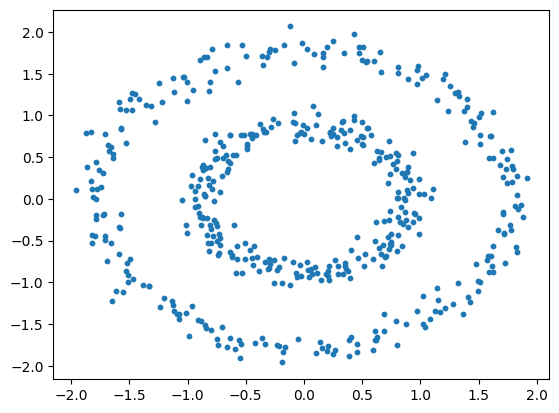

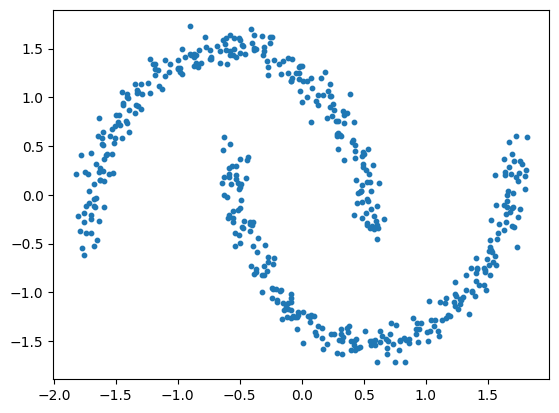

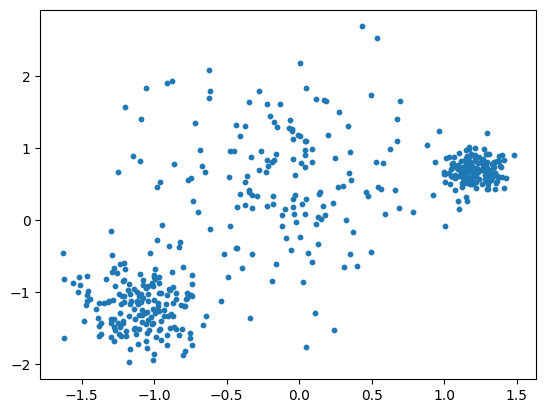

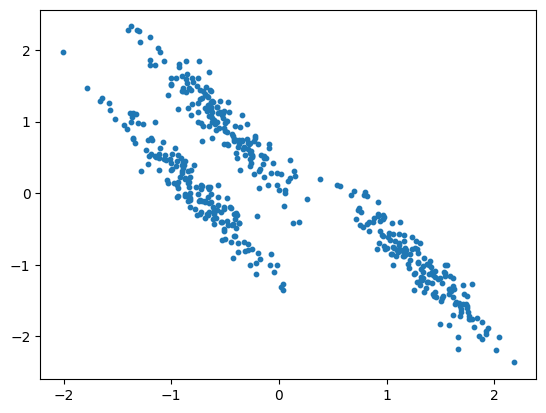

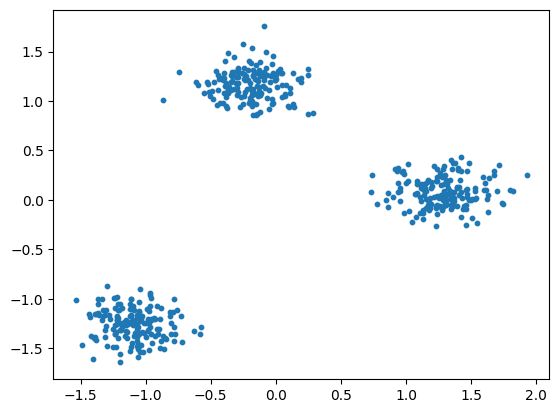

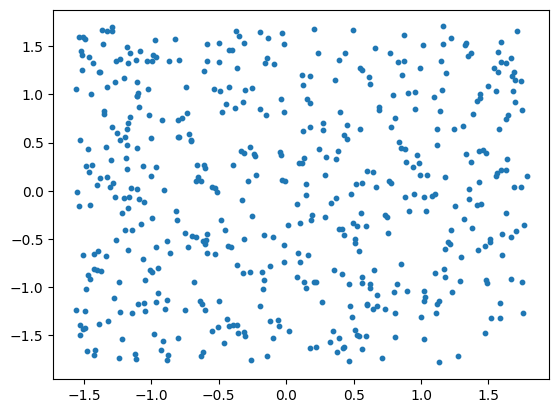

In [16]:
# for i_dataset, (dataset, algo_params) in enumerate(datasets_v):
#     X, y = dataset
#     X = StandardScaler().fit_transform(X)
#     plt.scatter(X[:,0],X[:,1],s=10)
#     plt.show()

<H2> Segunda Abordagem

In [107]:
def generate_multivariate_data(num_clusters, num_samples, std_devs):
    """
    Gera dados sintéticos em 2 dimensões usando a distribuição normal multivariada.

    :param num_clusters: Número de clusters (grupos) a serem gerados.
    :param num_samples: Número de amostras a serem geradas por cluster.
    :param std_devs: Lista com desvios padrão para cada cluster.
    :return: Dados gerados em forma de array numpy.
    """
    np.random.seed(42)
    points = []
    labels = []
    centers = np.random.uniform(-10, 50, (num_clusters, 2))  # Centros aleatórios para os clusters
    
    for i in range(num_clusters):
        center = centers[i]
        std_dev = std_devs[i%len(std_devs)]
        cluster_points = np.random.multivariate_normal(center, np.eye(2) * std_dev**2, num_samples)
        points.append(cluster_points)
        labels.append(np.full(shape=(num_samples, 1), fill_value=i))
    
    return np.vstack(points), np.vstack(labels), centers

In [108]:
def generate_synthetic_data(num_clusters: list, num_samples: int, std_devs: list):
    
    synthetic_data = []

    for n_c in num_clusters:
            
        data, labels, centers = generate_multivariate_data(n_c, num_samples, std_devs)

        # Plotar os dados
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.7, label='Dados')
        plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='.', s=100, label='Centros dos Clusters')
        #plt.title('Dados Gerados com Distribuição Normal Multivariada')
        #plt.xlabel('Dimensão 1')
        #plt.ylabel('Dimensão 2')
        plt.legend()
        plt.grid(True)
        plt.show()
        synthetic_data.append([data, labels, centers])
    return synthetic_data
    


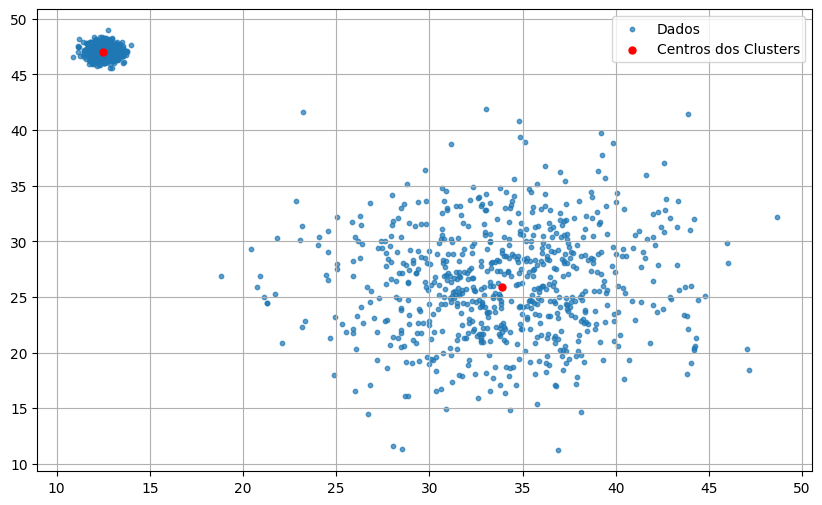

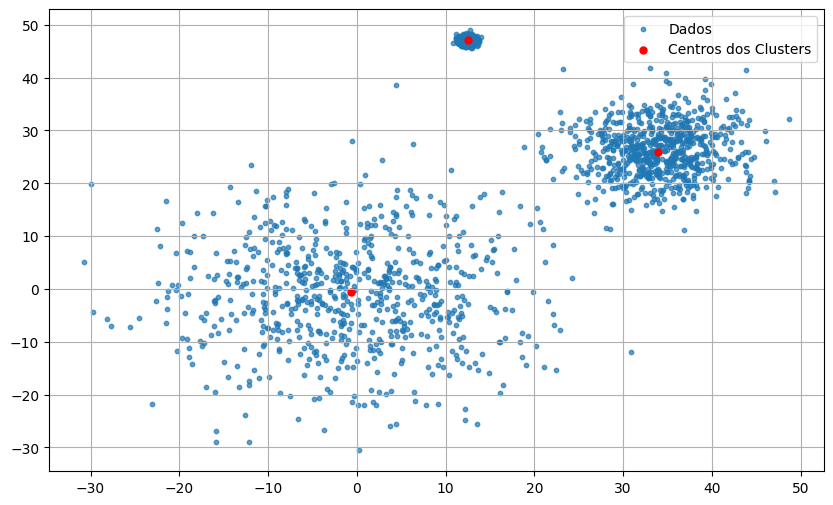

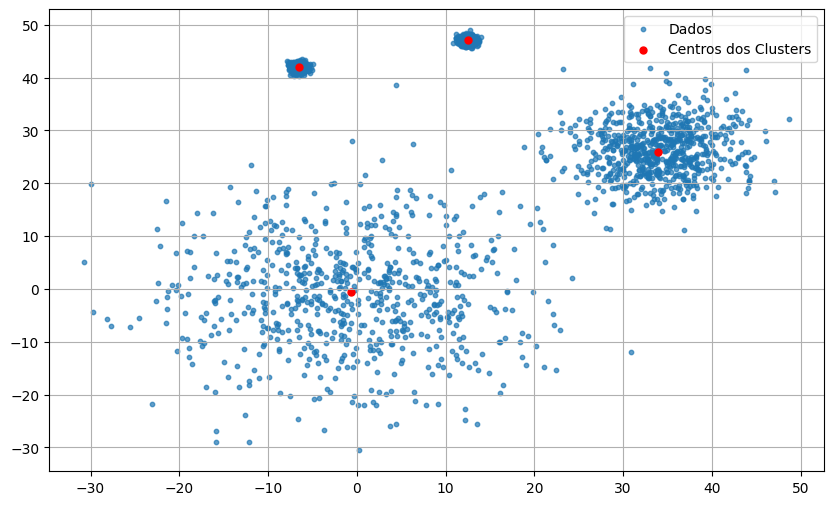

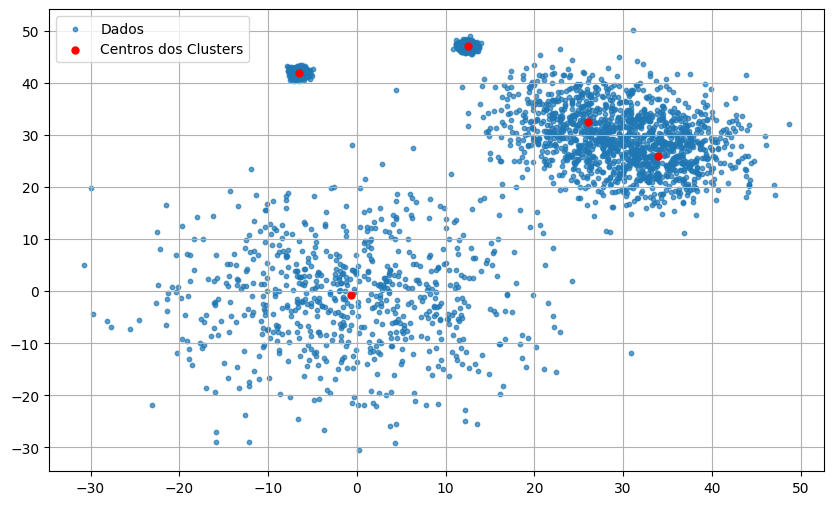

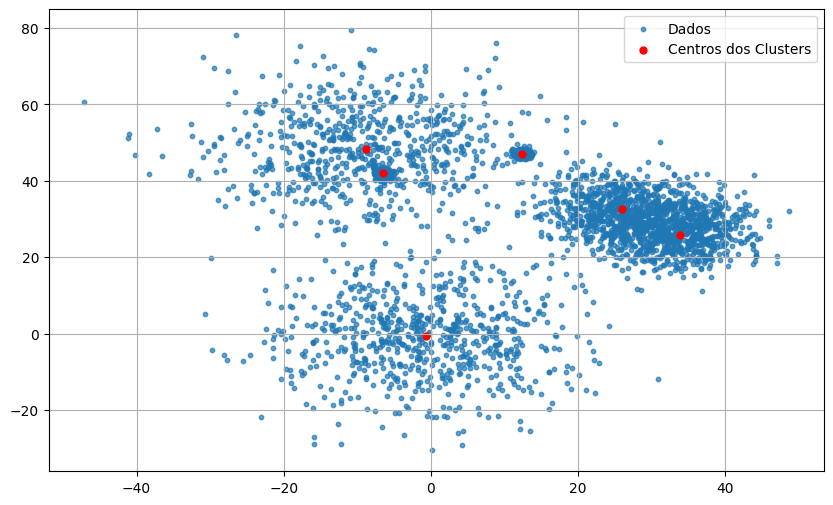

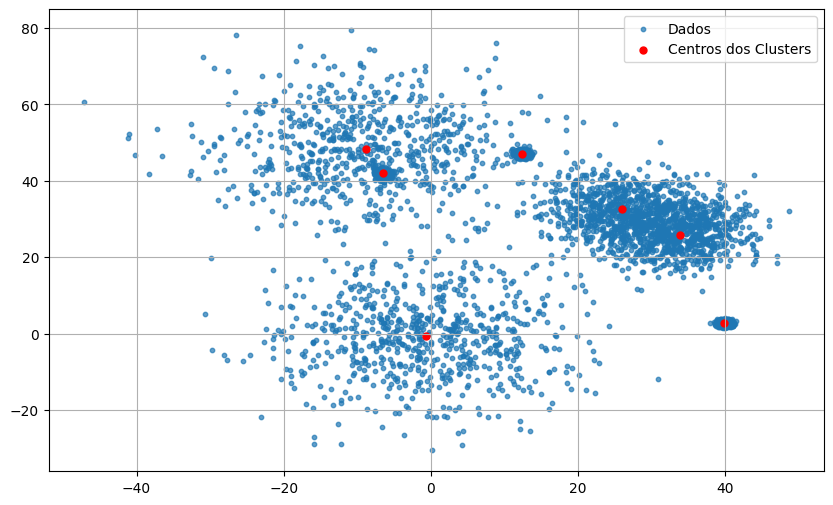

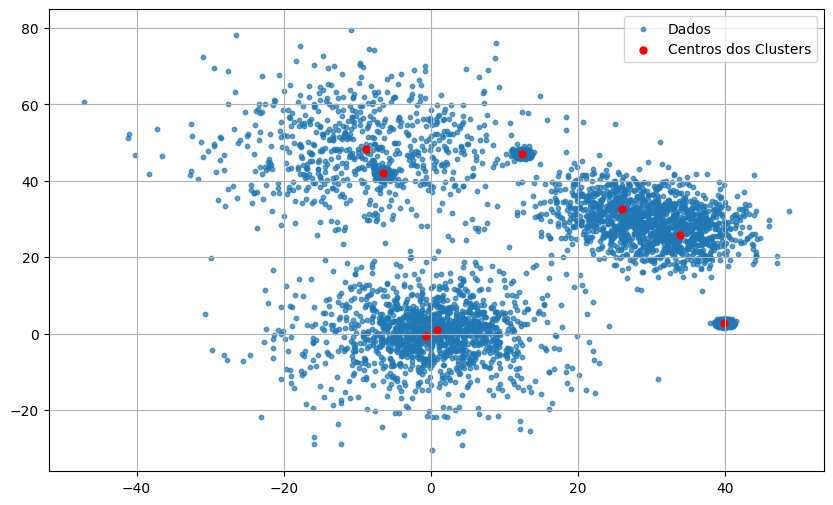

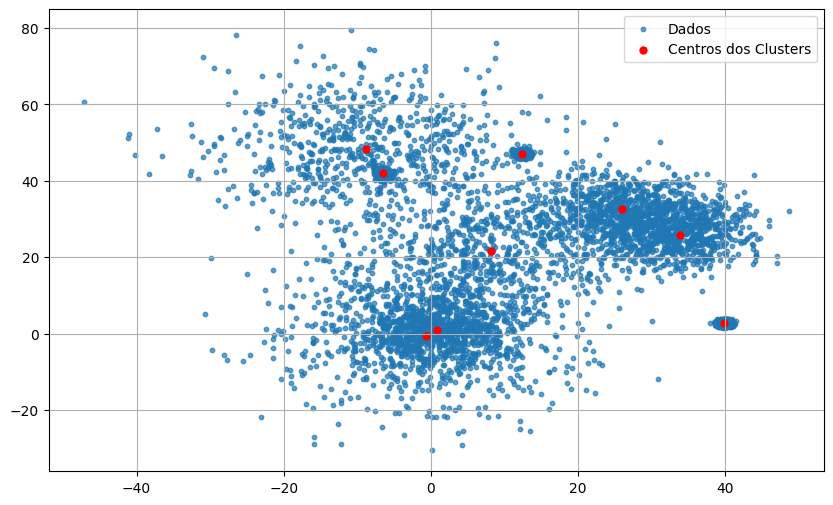

In [152]:
# num_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
# num_samples = 700
# std_devs = [0.5, 5.0, 10]
# data = generate_synthetic_data(num_clusters, num_samples, std_devs)